In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#load dataset
data = pd.read_csv(r"C:\Users\aniketh\Downloads\Churn\Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
pre_value =data['IsActiveMember'].value_counts()
pre_value

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [10]:
X = data.drop(['Tenure'], axis=1) #independent varibale
y = data['EstimatedSalary']  # dependent variable

In [11]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,125510.82,1,1,1,79084.10,0


In [12]:
y.head()

0    101348.88
1    112542.58
2    113931.57
3     93826.63
4     79084.10
Name: EstimatedSalary, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((6700, 13), (3300, 13))

In [27]:
DTree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
y_pred = DTree.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.8485


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1527,   80],
       [ 223,  170]], dtype=int64)

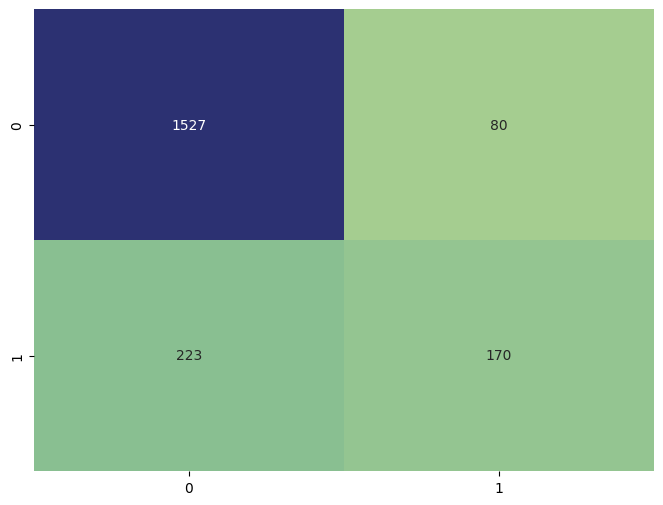

In [34]:
# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.show()

In [38]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



In [43]:
tree.plot_tree(DTree.fit(X_train, y_train))

[Text(0.5, 0.875, 'x[1] <= 44.5\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]'),
 Text(0.25, 0.625, 'x[4] <= 2.5\ngini = 0.228\nsamples = 6130\nvalue = [5324.0, 806.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 1.5\ngini = 0.204\nsamples = 5987\nvalue = [5296, 691]'),
 Text(0.0625, 0.125, 'gini = 0.3\nsamples = 2952\nvalue = [2410, 542]'),
 Text(0.1875, 0.125, 'gini = 0.093\nsamples = 3035\nvalue = [2886, 149]'),
 Text(0.375, 0.375, 'x[3] <= 57003.365\ngini = 0.315\nsamples = 143\nvalue = [28, 115]'),
 Text(0.3125, 0.125, 'gini = 0.477\nsamples = 56\nvalue = [22, 34]'),
 Text(0.4375, 0.125, 'gini = 0.128\nsamples = 87\nvalue = [6, 81]'),
 Text(0.75, 0.625, 'x[6] <= 0.5\ngini = 0.495\nsamples = 1870\nvalue = [1032, 838]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 51.5\ngini = 0.44\nsamples = 804\nvalue = [263, 541]'),
 Text(0.5625, 0.125, 'gini = 0.495\nsamples = 502\nvalue = [226, 276]'),
 Text(0.6875, 0.125, 'gini = 0.215\nsamples = 302\nval

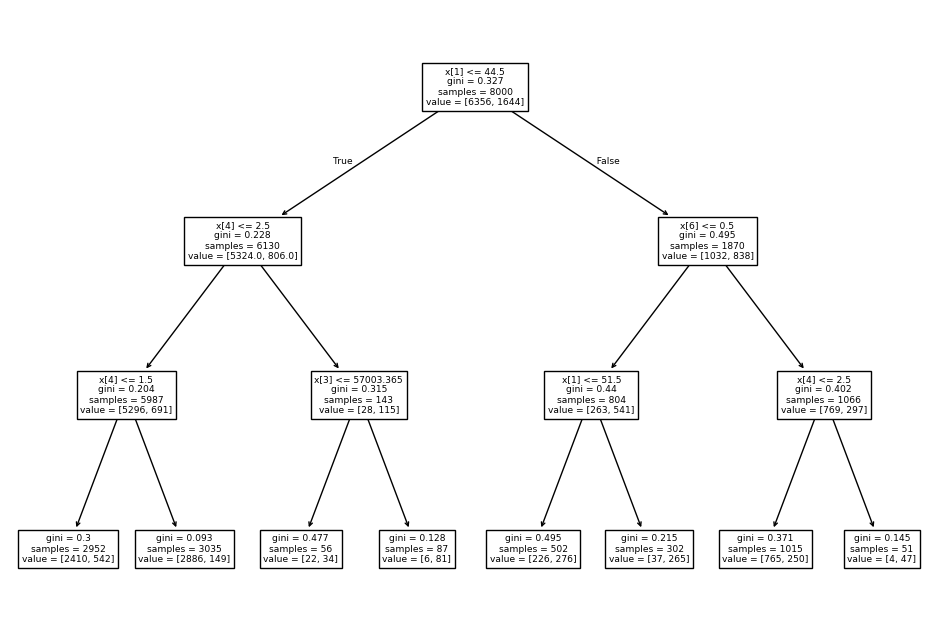

In [42]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(DTree.fit(X_train, y_train))
plt.show()